<a href="https://colab.research.google.com/github/Maliha-Haroon/BigData-course/blob/main/HeartProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# To make plots look better
sns.set(style="whitegrid", palette="muted")
%matplotlib inline


In [ ]:
# Load dataset
df = pd.read_csv('heart.csv')

# Display first 5 rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Dataset info
df.info()

# Descriptive statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Probability of target = 1 (heart disease)
prob_target_1 = len(df[df['target']==1]) / len(df)
print(f"Probability of heart disease (target=1): {prob_target_1:.2f}")

# Probability of target = 0
prob_target_0 = len(df[df['target']==0]) / len(df)
print(f"Probability of no heart disease (target=0): {prob_target_0:.2f}")

# Conditional probability: male and heart disease
prob_male_hd = len(df[(df['sex']==1) & (df['target']==1)]) / len(df[df['sex']==1])
print(f"Probability of heart disease among males: {prob_male_hd:.2f}")


Probability of heart disease (target=1): 0.51
Probability of no heart disease (target=0): 0.49
Probability of heart disease among males: 0.42


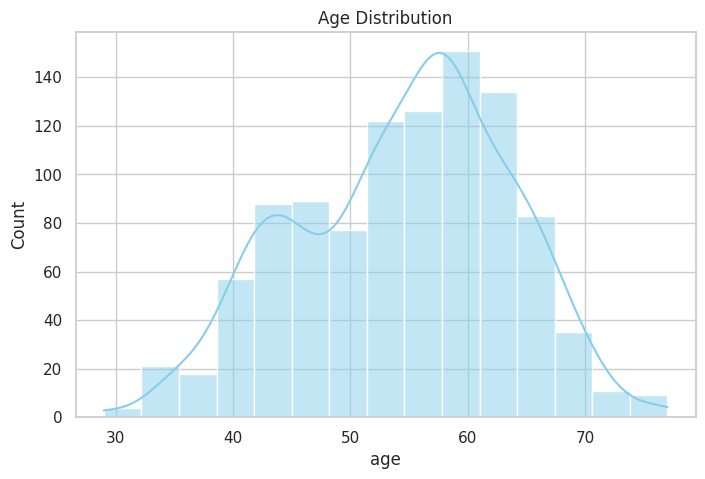

In [ ]:
# Histogram of age
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()



Model Accuracy: 0.99


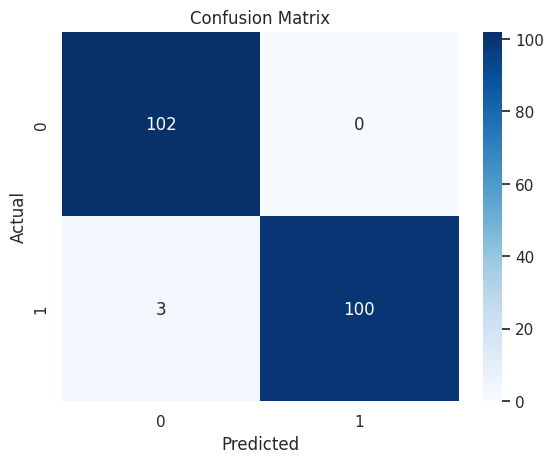

In [ ]:
# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)

# Accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


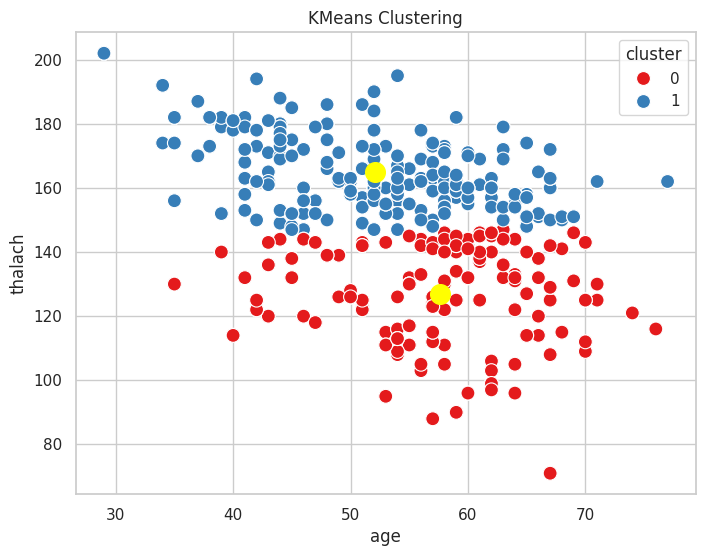

In [ ]:
# Using 2 features for visualization
X_cluster = df[['age', 'thalach']]

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='thalach', hue='cluster', palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='yellow', label='Centroids')
plt.title('KMeans Clustering')
plt.show()


In [ ]:
# Create Age Groups
bins = [20, 35, 50, 65, 80]
labels = ['20-35', '36-50', '51-65', '66-80']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Check new column
df[['age', 'age_group', 'sex', 'target']].head()


,age,age_group,sex,target
0,52,51-65,1,0
1,53,51-65,1,0
2,70,66-80,1,0
3,61,51-65,1,0
4,62,51-65,0,0


/tmp/ipython-input-844960757.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stack = df.groupby(['age_group', 'target']).size().unstack()


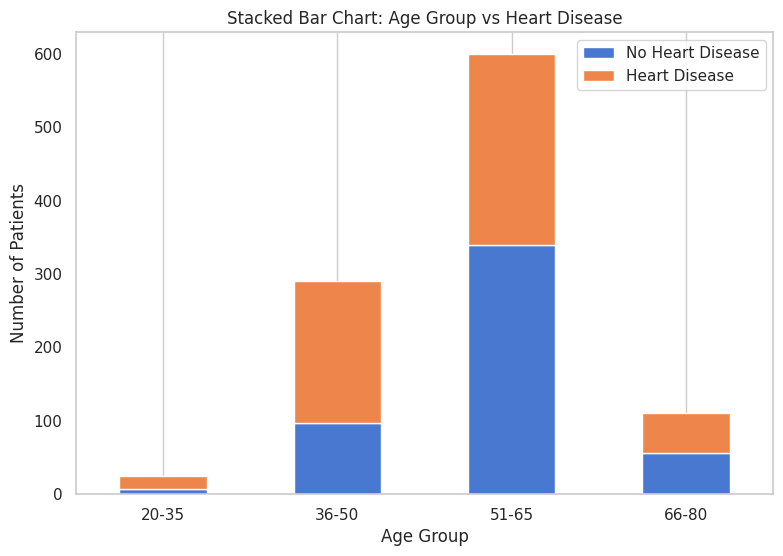

In [ ]:
# Count values for stacked bar
age_stack = df.groupby(['age_group', 'target']).size().unstack()

# Plot stacked bar chart
age_stack.plot(kind='bar', stacked=True, figsize=(9,6))

plt.title('Stacked Bar Chart: Age Group vs Heart Disease')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


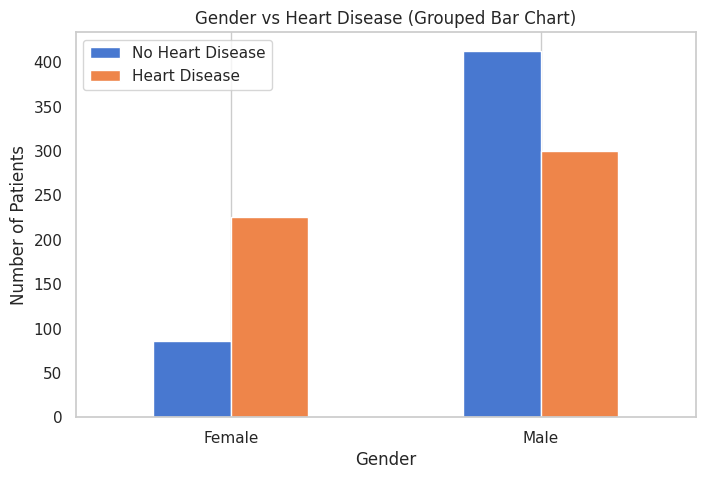

In [ ]:
# Replace sex values with labels
df['sex_label'] = df['sex'].map({0: 'Female', 1: 'Male'})

# Count values for grouped bar
gender_count = df.groupby(['sex_label', 'target']).size().unstack()

# Plot grouped bar chart
gender_count.plot(kind='bar', figsize=(8,5))

plt.title('Gender vs Heart Disease (Grouped Bar Chart)')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


/tmp/ipython-input-594072095.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_ratio = df.groupby('age_group')['target'].mean()


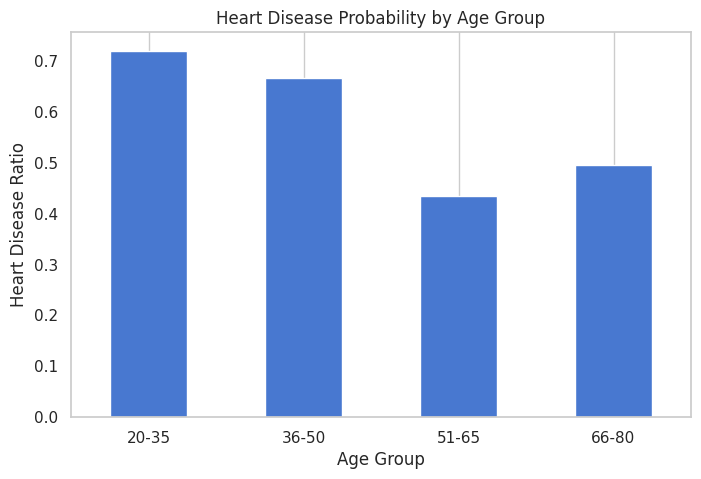

In [ ]:
# Heart disease ratio by age group
age_ratio = df.groupby('age_group')['target'].mean()

# Bar Plot
plt.figure(figsize=(8,5))
age_ratio.plot(kind='bar')

plt.title('Heart Disease Probability by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease Ratio')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


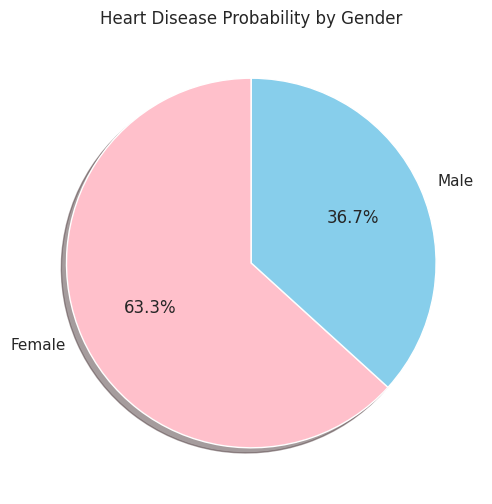

In [ ]:
# Heart disease ratio by gender (Custom Color Pie Chart)

gender_ratio = df.groupby('sex_label')['target'].mean()

# Custom colors: Female = Pink, Male = Blue
colors = ['pink', 'skyblue']

plt.figure(figsize=(6,6))
plt.pie(
    gender_ratio,
    labels=gender_ratio.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True
)

plt.title('Heart Disease Probability by Gender')
plt.show()


# **Final Analysis**

The analysis of the heart disease dataset shows that people aged 51–65 years have the highest risk of heart disease. The visualizations and probability results also confirm that males are more affected by heart disease than females. Younger individuals, especially those aged 20–35, show the lowest risk.

